In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Sensitivity of cchem parameterspace to physics 
 
    PLOT: TA=DIC=2000 at T = 5-25, S = 0 - 35
    omega, pH


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [4]:
#salinity 0-35
#
S = np.zeros([200,350])
T = np.zeros([200,350])
TA = np.zeros([200,350])
DIC = np.zeros([200,350])

DIC[:] = 2000 * 1e-6
TA[:] = 2000 * 1e-6

for i in range(0,200):
    T[i,:] = 0.1*i
for i in range(0,350):
    S[:,i] = 0.1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC)
TAr = np.ravel(TA)

zero = DICr *0


In [5]:
response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTS = pH.reshape(200,350)
OmegaAr_vTS = OmegaA.reshape(200,350)

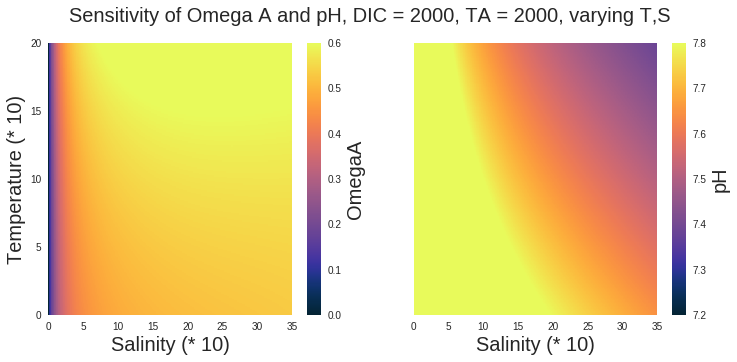

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
t_cmap = cm.cm.thermal


major_x = np.arange(0, 351, 50)
major_y = np.arange(0, 201, 50)
x_lab = (['0','5','10','15','20','25','30','35'])
y_lab = (['0','5','10','15','20'])
ax1.set_xticks(major_x)
ax1.set_yticks(major_y)
ax1.set_xticklabels(x_lab)
ax1.set_yticklabels(y_lab)
ax2.set_xticklabels(x_lab)
#ax.set_xticks(minor_ticks, minor=True)

#ax.set_yticks(minor_ticks, minor=True)

tplt = OmegaAr_vTS
v_min = 0
v_max = 0.6
clabel = 'OmegaA'
mesh = ax1.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)


cbar = fig.colorbar(mesh, ax=ax1)
cbar.set_label(clabel, fontsize = 20 )
ax1.set_xlabel('Salinity (* 10)', fontsize = 20 )
ax1.set_ylabel('Temperature (* 10)', fontsize = 20 )
ax1.set_title('',fontsize = 20 )

tplt = pHr_vTS
v_min = 7.2
v_max = 7.8
clabel = 'pH'
t_cmap = cm.cm.thermal
mesh = ax2.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)



cbar = fig.colorbar(mesh, ax=ax2)
cbar.set_label(clabel, fontsize = 20 )
ax2.set_xlabel('Salinity (* 10)', fontsize = 20 )
ax2.set_ylabel('', fontsize = 20 )
ax2.set_title('',fontsize = 20 )

plt.suptitle('Sensitivity of Omega A and pH, DIC = 2000, TA = 2000, varying T,S ',fontsize=20)

In [7]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([400,400])
S[:] = 30
T = np.zeros([400,400])
T[:] = 10
TA = np.zeros([400,400])
DIC = np.zeros([400,400])

DIC[:] = 2000 * 1e-6
TA[:] = 2000 * 1e-6

for i in range(0,400):
    DIC[i,:] = 1800 + 1*i
for i in range(0,400):
    TA[:,i] = 1800 + 1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vDT = pH.reshape(400,400)
OmegaAr_vDT = OmegaA.reshape(400,400)

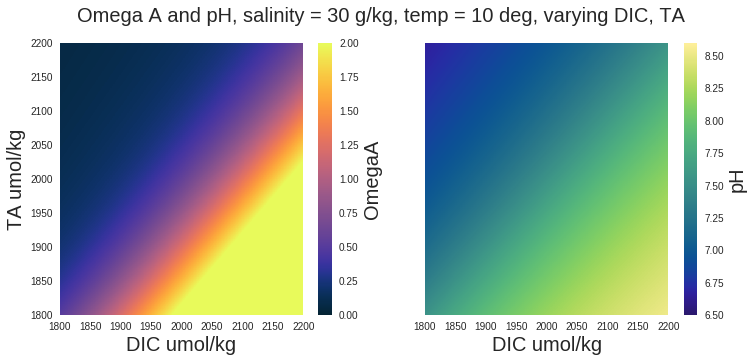

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
t_cmap = cm.cm.thermal


major_x = np.arange(0, 401, 50)

x_lab = (['1800','1850','1900','1950','2000','2050','2100','2150','2200'])
ax1.set_xticks(major_x)
ax1.set_yticks(major_x)
ax1.set_xticklabels(x_lab)
ax1.set_yticklabels(x_lab)
ax2.set_xticklabels(x_lab)

tplt = OmegaAr_vDT
v_min = 0
v_max = 2
clabel = 'OmegaA'
mesh = ax1.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)


cbar = fig.colorbar(mesh, ax=ax1)
cbar.set_label(clabel, fontsize = 20 )
ax1.set_xlabel('DIC umol/kg', fontsize = 20 )
ax1.set_ylabel('TA umol/kg', fontsize = 20 )
ax1.set_title('',fontsize = 20 )

tplt = pHr_vDT
v_min = 6.5
v_max = 8.6
clabel = 'pH'
t_cmap = cm.cm.haline
mesh = ax2.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)



cbar = fig.colorbar(mesh, ax=ax2)
cbar.set_label(clabel, fontsize = 20 )
ax2.set_xlabel('DIC umol/kg', fontsize = 20 )
ax2.set_ylabel('', fontsize = 20 )
ax2.set_title('',fontsize = 20 )

plt.suptitle('Omega A and pH, salinity = 30 g/kg, temp = 10 deg, varying DIC, TA ',fontsize=20)

In [9]:
## Retreive one dataset 
date = 'Nov 13, 2014'
ptrc = '/results/SalishSea/hindcast/13nov14/SalishSea_1d_20141113_20141113_carp_T.nc'
grid = '/results/SalishSea/hindcast/13nov14/SalishSea_1d_20141113_20141113_grid_T.nc'
w = nc.Dataset(ptrc)
wp = nc.Dataset(grid)

# major_x = np.arange(0, 401, 50)
# x_lab = (['1800','1850','1900','1950','2000','2050','2100','2150','2200'])
# ax1.set_xticks(major_x)
# ax1.set_yticks(major_x)
# ax1.set_xticklabels(x_lab)
# ax1.set_yticklabels(x_lab)
# ax2.set_xticklabels(x_lab)

# tplt = OmegaAr
# v_min = 0
# v_max = 2
# clabel = 'OmegaA'
# mesh = ax1.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)


# cbar = fig.colorbar(mesh, ax=ax1)
# cbar.set_label(clabel, fontsize = 20 )
# ax1.set_xlabel('DIC umol/kg', fontsize = 20 )
# ax1.set_ylabel('TA umol/kg', fontsize = 20 )
# ax1.set_title('',fontsize = 20 )

# tplt = pHr
# v_min = 6.5
# v_max = 8.6
# clabel = 'pH'
# t_cmap = cm.cm.haline
# mesh = ax2.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)



# cbar = fig.colorbar(mesh, ax=ax2)
# cbar.set_label(clabel, fontsize = 20 )
# ax2.set_xlabel('DIC umol/kg', fontsize = 20 )
# ax2.set_ylabel('', fontsize = 20 )
# ax2.set_title('',fontsize = 20 )